In [ ]:
from google.colab import files
uploaded= files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv
Saving online_shoppers_intention_reorder_columns.csv to online_shoppers_intention_reorder_columns.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import graphviz 
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from tabulate import tabulate
from sklearn import preprocessing

In [ ]:
#Loading the dataset
df_shoppers = pd.read_csv('online_shoppers_intention.csv')
df_shoppers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
df_shoppers.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df_shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df_shoppers.nunique() 

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [ ]:
df_shoppers.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
revenue_true = df_shoppers.Revenue == True
df_revenue = df_shoppers[revenue_true]
print(df_revenue.shape)

weekend_true = df_shoppers.Weekend == True
revenue_true = df_shoppers.Revenue == True
filter_all = weekend_true & revenue_true
df_1 = df_shoppers[filter_all]
print(df_1.shape)

weekend_false = df_shoppers.Weekend == False
revenue_true = df_shoppers.Revenue == True
filter_all = weekend_false & revenue_true
df_2 = df_shoppers[filter_all]
print(df_2.shape)

(1908, 18)
(499, 18)
(1409, 18)


In [ ]:
print('Revenue was generated (Out of all sessions):', round((1908/12330)*100,2), '%')
print('Revenue was generated when its weekend:     ', round((499/1908)*100,2),'%')
print('Revenue was generated when its weekdays:    ', round((1409/1908)*100,2),'%')

Revenue was generated (Out of all sessions): 15.47 %
Revenue was generated when its weekend:      26.15 %
Revenue was generated when its weekdays:     73.85 %


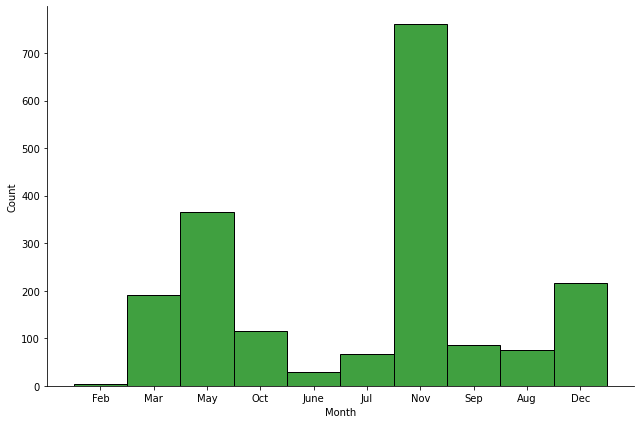

In [ ]:
#Month with the most no. of transactions
sns.displot(df_revenue, x="Month", hue_order=True, color='Green', height=6, aspect=1.5 )

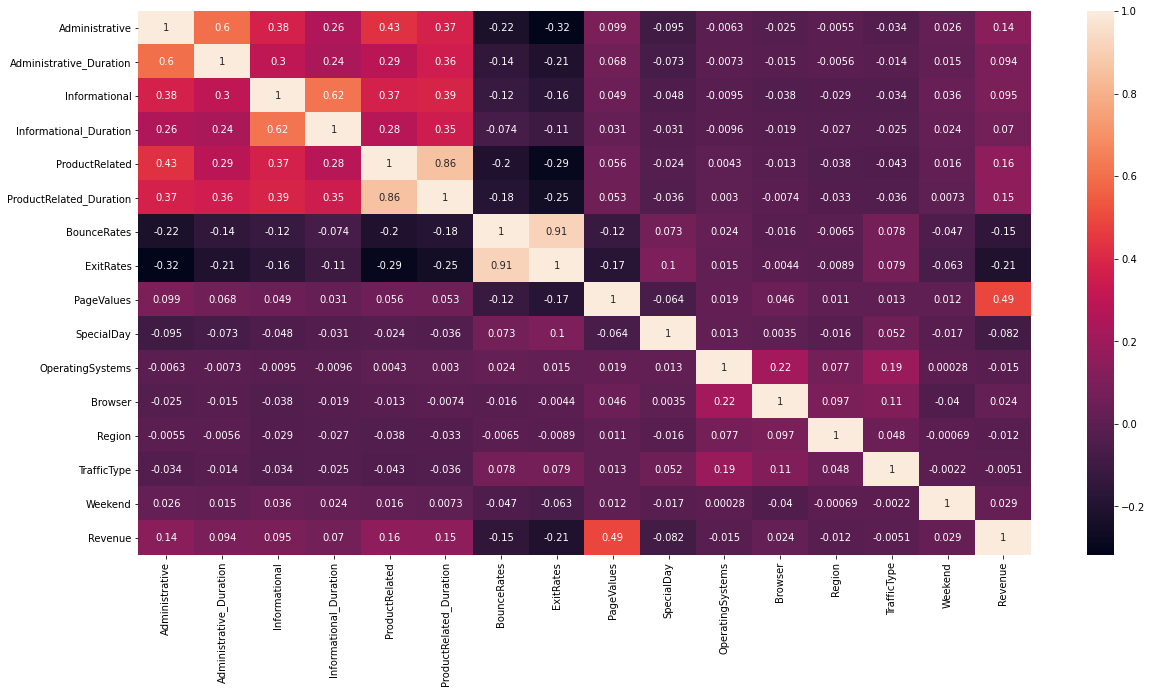

In [ ]:
#Plotting the correlation matrix
corr = df_shoppers.corr()
plt.figure(figsize = (20,10),)
sns.heatmap(corr,annot=True)

### **It can be seen that "ProductRelated" and "ProductRelated_Duration" are highly correlated. So are the variables "BounceRates" and "ExitRates". Hence they have to dropped**

In [ ]:
df_shoppers_copy=df_shoppers.copy()

In [ ]:
# Dropping highly correlated columns
df_shoppers_copy= df_shoppers_copy.drop(["ProductRelated_Duration","ExitRates"],axis=1)
df_shoppers_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,0.00,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,0.05,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,0.02,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


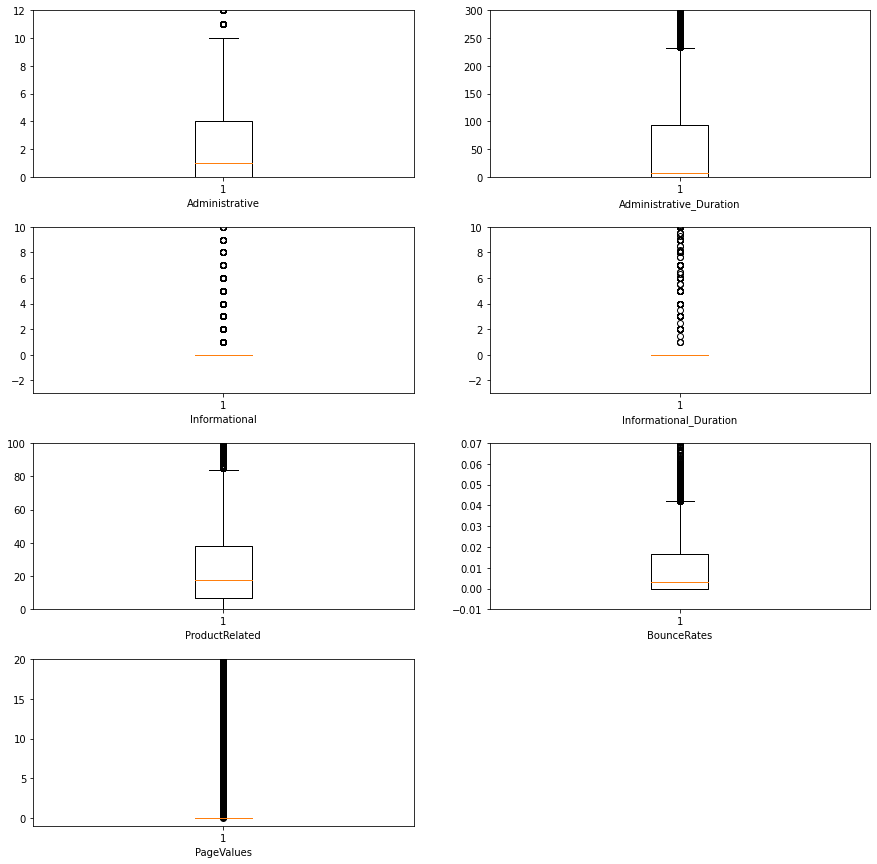

In [ ]:
#Checking for outlier with boxplots
import seaborn as sns 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,15))
#fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(4, 2, 1)
plt.ylim(0,12)
plt.xlabel('Administrative')
plt.boxplot(df_shoppers.Administrative)
ax = fig.add_subplot(4, 2, 2)
plt.ylim(0,300)
plt.xlabel('Administrative_Duration')
plt.boxplot(df_shoppers.Administrative_Duration)
plt.subplots_adjust(hspace = 0.3)
ax = fig.add_subplot(4, 2, 3)
plt.ylim(-3,10)
plt.xlabel('Informational')
plt.boxplot(df_shoppers.Informational)
ax = fig.add_subplot(4, 2, 4)
plt.ylim(-3,10)
plt.xlabel('Informational_Duration')
plt.boxplot(df_shoppers.Informational_Duration)
ax = fig.add_subplot(4, 2, 5)
plt.ylim(0,100)
plt.xlabel('ProductRelated')
plt.boxplot(df_shoppers.ProductRelated)
ax = fig.add_subplot(4, 2, 6)
plt.ylim(-0.01,0.07)
plt.xlabel('BounceRates')
plt.boxplot(df_shoppers.BounceRates)
ax = fig.add_subplot(4, 2, 7)
plt.ylim(-1,20)
plt.xlabel('PageValues')
plt.boxplot(df_shoppers.PageValues)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


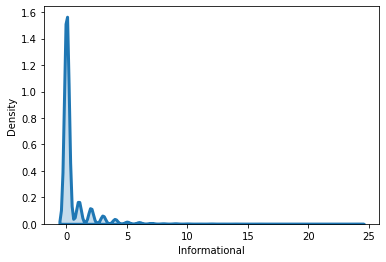

In [ ]:
#Density plot showing the distribution of the data
sns.distplot(df_shoppers.Informational, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


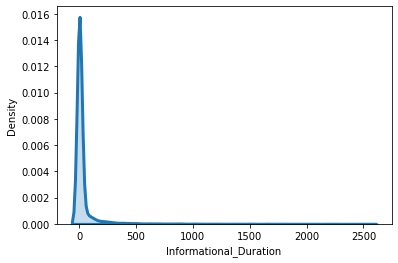

In [ ]:
#Density plot showing the distribution of the data
sns.distplot(df_shoppers.Informational_Duration, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


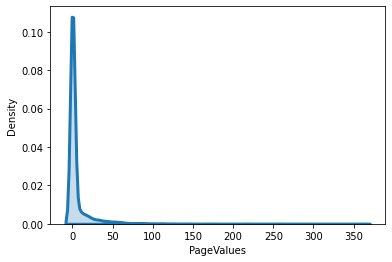

In [ ]:
#Density plot showing the distribution of the data
sns.distplot(df_shoppers.PageValues, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

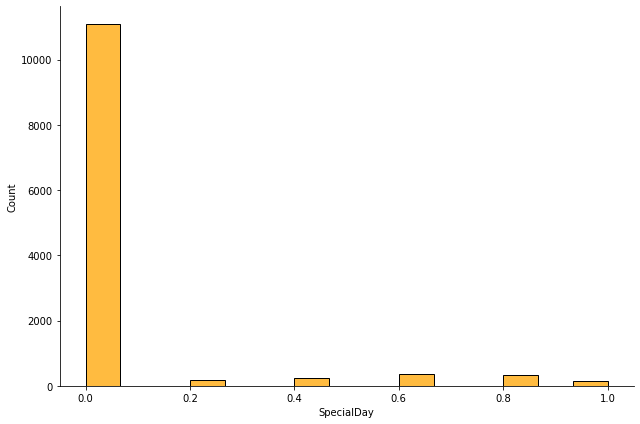

In [ ]:
#Shows the distribution of the Categorical feature "Special days" 
sns.displot(df_shoppers, x="SpecialDay", hue_order=True, color='Orange', height=6, aspect=1.5 )

In [ ]:
df_shoppers_knn = df_shoppers_copy.copy()

In [ ]:
df_shoppers_knn

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,0.000000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,0.050000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,0.020000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,0.007143,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,0.000000,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,0.083333,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,0.000000,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
obj_df = df_shoppers_knn.select_dtypes(include=['object']).copy()
obj_df.head()

,Month,VisitorType
0,Feb,Returning_Visitor
1,Feb,Returning_Visitor
2,Feb,Returning_Visitor
3,Feb,Returning_Visitor
4,Feb,Returning_Visitor


In [ ]:
df_shoppers_knn.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [ ]:
#Label encoding the categorical features "Visitor Type" and "Month"
cleanup = {"Month":{"Feb": 4, "Mar": 2,"May": 2,"June": 2,"Jul": 2,"Aug": 2,"Sep": 2,"Oct": 2,"Nov": 2,"Dec": 2},
                "VisitorType": {"New_Visitor": 1, "Returning_Visitor": 2, "Other": 3}}

In [ ]:
df_shoppers_knn = df_shoppers_knn.replace(cleanup)
df_shoppers_knn

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.200000,0.000000,0.0,4,1,1,1,1,2,False,False
1,0,0.0,0,0.0,2,0.000000,0.000000,0.0,4,2,2,1,2,2,False,False
2,0,0.0,0,0.0,1,0.200000,0.000000,0.0,4,4,1,9,3,2,False,False
3,0,0.0,0,0.0,2,0.050000,0.000000,0.0,4,3,2,2,4,2,False,False
4,0,0.0,0,0.0,10,0.020000,0.000000,0.0,4,3,3,1,4,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,0.007143,12.241717,0.0,2,4,6,1,1,2,True,False
12326,0,0.0,0,0.0,5,0.000000,0.000000,0.0,2,3,2,1,8,2,True,False
12327,0,0.0,0,0.0,6,0.083333,0.000000,0.0,2,3,2,1,13,2,True,False
12328,4,75.0,0,0.0,15,0.000000,0.000000,0.0,2,2,2,3,11,2,False,False


### **Removing outliers, standardizing data and PCA**

In [ ]:
#removing all the rows with outliers
l=list(range(len(df_shoppers_copy)))
for j in range(7):
  high=np.mean(df_shoppers_copy.iloc[:,j])+ 3*np.std(df_shoppers_copy.iloc[:,j])
  low=np.mean(df_shoppers_copy.iloc[:,j])- 3*np.std(df_shoppers_copy.iloc[:,j])
  k=[i for i in l if df_shoppers_copy.iloc[i,j]<high and  df_shoppers_copy.iloc[i,j]>low]
  l.clear()
  l=k
df_shoppers_copy=df_shoppers_copy.iloc[l,:]

In [ ]:
print(df_shoppers.shape,df_shoppers_copy.shape)
print(df_shoppers.shape[0]-df_shoppers_copy.shape[0], " rows were removed as they were outliers ")

(12330, 18) (10515, 16)
1815  rows were removed as they were outliers 


In [ ]:
revenue_true = df_shoppers_copy.Revenue == True
df_revenue = df_shoppers_copy[revenue_true]
print(df_revenue.shape)
print(df_shoppers.shape)

(1475, 16)
(12330, 18)


In [ ]:
df_shoppers_copy

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.0,0,0.0,2,0.000000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,0.050000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,0.020000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,0.015789,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
8,0,0.0,0,0.0,2,0.000000,0.000000,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,0.007143,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,0.000000,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,0.083333,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,0.000000,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
print('Revenue was generated (Out of all sessions):', round((1475/12330)*100,2), '%')

Revenue was generated (Out of all sessions): 11.96 %


In [ ]:
#standardizing the numerical variables

array=df_shoppers[["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","BounceRates","PageValues"]]
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

#array= df_shoppers.loc[:,df_shoppers.columns!="Revenue"]
X_std = StandardScaler().fit_transform(array)
df_shoppers_copy[["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","BounceRates","PageValues"]]=pd.DataFrame(X_std,columns=[["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","BounceRates","PageValues"]])

In [ ]:
df_shoppers_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,0.573535,-0.317178,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.045196,-0.317178,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.132035,-0.317178,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
8,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,0.8,Feb,2,2,2,3,Returning_Visitor,False,False


In [ ]:
#The non Special day values are uniformly divided - Hence could create dummy variables for each of the value 
print(np.cumsum(df_shoppers.SpecialDay.value_counts()/len(df_shoppers)))
# Capturing all the values
all_special_days=list(df_shoppers.SpecialDay.unique())

0.0    0.898540
0.6    0.927007
0.8    0.953366
0.4    0.973074
0.2    0.987510
1.0    1.000000
Name: SpecialDay, dtype: float64


In [ ]:
#function for creating top X dummy variables 
def one_hot_top_x_variables(dataframe,variable,top_x_labels):
    for label in top_x_labels:
        df_shoppers_copy[variable+'_'+str(label)] = np.where(df_shoppers_copy[variable]==label,1,0)

In [ ]:
#Introducing dummy variables for Special days 
one_hot_top_x_variables(df_shoppers_copy,"SpecialDay",all_special_days)
df_shoppers_copy=df_shoppers_copy.drop(["SpecialDay"],axis=1)
df_shoppers_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,SpecialDay_0.0,SpecialDay_0.4,SpecialDay_0.8,SpecialDay_1.0,SpecialDay_0.2,SpecialDay_0.6
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,Feb,2,2,1,2,Returning_Visitor,False,False,1,0,0,0,0,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,0.573535,-0.317178,Feb,3,2,2,4,Returning_Visitor,False,False,1,0,0,0,0,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.045196,-0.317178,Feb,3,3,1,4,Returning_Visitor,True,False,1,0,0,0,0,0
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.132035,-0.317178,Feb,2,2,1,3,Returning_Visitor,False,False,1,0,0,0,0,0
8,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,Feb,2,2,2,3,Returning_Visitor,False,False,0,0,1,0,0,0


In [ ]:
#Checking top counts for variable Month
k=(df_shoppers_copy.Month.value_counts().sort_values(ascending=False)/len(df_shoppers_copy))*100
print((k))
#Select values that contribute more than 3% 
top_months=(k>3).head(10).index

May     27.941037
Nov     23.271517
Mar     15.729910
Dec     13.932477
Oct      4.488825
Sep      3.747028
Jul      3.604375
Aug      3.566334
June     2.301474
Feb      1.417023
Name: Month, dtype: float64


In [ ]:
#Creating Dummy variables for column Month
one_hot_top_x_variables(df_shoppers_copy,"Month",top_months)
df_shoppers_copy=df_shoppers_copy.drop(["Month"],axis=1)
df_shoppers_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,SpecialDay_0.0,SpecialDay_0.4,SpecialDay_0.8,SpecialDay_1.0,SpecialDay_0.2,SpecialDay_0.6,Month_May,Month_Nov,Month_Mar,Month_Dec,Month_Oct,Month_Sep,Month_Jul,Month_Aug,Month_June,Month_Feb
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,2,2,1,2,Returning_Visitor,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,0.573535,-0.317178,3,2,2,4,Returning_Visitor,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.045196,-0.317178,3,3,1,4,Returning_Visitor,True,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.132035,-0.317178,2,2,1,3,Returning_Visitor,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,2,2,2,3,Returning_Visitor,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# % contribution of each value 
print(df_shoppers_copy.OperatingSystems.value_counts()/len(df_shoppers_copy)*100)
#Selecting top 4 values
top_OS=(df_shoppers_copy.OperatingSystems.value_counts()/len(df_shoppers_copy)*100).head(4).index


2    53.875416
1    20.789349
3    20.608654
4     3.984784
8     0.494532
6     0.142653
5     0.057061
7     0.047551
Name: OperatingSystems, dtype: float64


In [ ]:
#Creating dummy variables for OS column
one_hot_top_x_variables(df_shoppers_copy,"OperatingSystems",top_OS)
df_shoppers_copy=df_shoppers_copy.drop(["OperatingSystems"],axis=1)
df_shoppers_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,SpecialDay_0.0,SpecialDay_0.4,SpecialDay_0.8,SpecialDay_1.0,SpecialDay_0.2,SpecialDay_0.6,Month_May,Month_Nov,Month_Mar,Month_Dec,Month_Oct,Month_Sep,Month_Jul,Month_Aug,Month_June,Month_Feb,OperatingSystems_2,OperatingSystems_1,OperatingSystems_3,OperatingSystems_4
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,2,1,2,Returning_Visitor,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,0.573535,-0.317178,2,2,4,Returning_Visitor,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.045196,-0.317178,3,1,4,Returning_Visitor,True,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.132035,-0.317178,2,1,3,Returning_Visitor,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
8,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,2,2,3,Returning_Visitor,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [ ]:
# % contribution of each value 
print((df_shoppers_copy.Browser.value_counts()/len(df_shoppers_copy))*100)
#Selecting top 8 values
top_Browser=(df_shoppers_copy.Browser.value_counts()/len(df_shoppers_copy)*100).head(8).index
top_Browser

2     64.545887
1     19.857347
4      6.096053
5      3.842130
6      1.436044
10     1.340942
8      1.084165
3      0.874941
7      0.408940
13     0.351878
12     0.095102
11     0.057061
9      0.009510
Name: Browser, dtype: float64


Int64Index([2, 1, 4, 5, 6, 10, 8, 3], dtype='int64')

In [ ]:
#Creating dummy variables for Broswer column
one_hot_top_x_variables(df_shoppers_copy,"Browser",top_Browser)
df_shoppers_copy=df_shoppers_copy.drop(["Browser"],axis=1)
df_shoppers_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,Region,TrafficType,VisitorType,Weekend,Revenue,SpecialDay_0.0,SpecialDay_0.4,SpecialDay_0.8,SpecialDay_1.0,SpecialDay_0.2,SpecialDay_0.6,Month_May,Month_Nov,Month_Mar,Month_Dec,Month_Oct,Month_Sep,Month_Jul,Month_Aug,Month_June,Month_Feb,OperatingSystems_2,OperatingSystems_1,OperatingSystems_3,OperatingSystems_4,Browser_2,Browser_1,Browser_4,Browser_5,Browser_6,Browser_10,Browser_8,Browser_3
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,1,2,Returning_Visitor,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,0.573535,-0.317178,2,4,Returning_Visitor,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.045196,-0.317178,1,4,Returning_Visitor,True,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.132035,-0.317178,1,3,Returning_Visitor,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
8,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,2,3,Returning_Visitor,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# % contribution of each value 
print((df_shoppers_copy.Region.value_counts()/len(df_shoppers_copy))*100)
#Selecting top 6 values
top_Region=(df_shoppers_copy.Region.value_counts()/len(df_shoppers_copy)*100).head(6).index
top_Region

1    38.621018
3    19.581550
4     9.529244
2     9.281978
6     6.600095
7     6.210176
9     3.965763
8     3.651926
5     2.558250
Name: Region, dtype: float64


Int64Index([1, 3, 4, 2, 6, 7], dtype='int64')

In [ ]:
#Creating dummy variables for Region column
one_hot_top_x_variables(df_shoppers_copy,"Region",top_Region)
df_shoppers_copy=df_shoppers_copy.drop(["Region"],axis=1)
df_shoppers_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,TrafficType,VisitorType,Weekend,Revenue,SpecialDay_0.0,SpecialDay_0.4,SpecialDay_0.8,SpecialDay_1.0,SpecialDay_0.2,SpecialDay_0.6,Month_May,Month_Nov,Month_Mar,Month_Dec,Month_Oct,Month_Sep,Month_Jul,Month_Aug,Month_June,Month_Feb,OperatingSystems_2,OperatingSystems_1,OperatingSystems_3,OperatingSystems_4,Browser_2,Browser_1,Browser_4,Browser_5,Browser_6,Browser_10,Browser_8,Browser_3,Region_1,Region_3,Region_4,Region_2,Region_6,Region_7
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,2,Returning_Visitor,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,0.573535,-0.317178,4,Returning_Visitor,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.045196,-0.317178,4,Returning_Visitor,True,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.132035,-0.317178,3,Returning_Visitor,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
8,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,3,Returning_Visitor,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# % contribution of each value 
print(np.cumsum(df_shoppers_copy.TrafficType.value_counts()/len(df_shoppers_copy))*100)
#Selecting values that capture 90% of distribution
top_TrafficType=(df_shoppers_copy.TrafficType.value_counts()/len(df_shoppers_copy)*100).head(7).index
top_TrafficType

2      31.497860
1      51.050880
3      67.731812
4      76.795055
13     82.596291
6      86.371850
10     90.080837
8      92.886353
5      95.197337
11     97.261056
20     98.687589
7      99.039467
9      99.362815
15     99.619591
19     99.762244
14     99.876367
18     99.961959
16     99.980980
12     99.990490
17    100.000000
Name: TrafficType, dtype: float64


Int64Index([2, 1, 3, 4, 13, 6, 10], dtype='int64')

In [ ]:
#Creating dummy variables for Region column
one_hot_top_x_variables(df_shoppers_copy,"TrafficType",top_TrafficType)
df_shoppers_copy=df_shoppers_copy.drop(["TrafficType"],axis=1)
df_shoppers_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,VisitorType,Weekend,Revenue,SpecialDay_0.0,SpecialDay_0.4,SpecialDay_0.8,SpecialDay_1.0,SpecialDay_0.2,SpecialDay_0.6,Month_May,Month_Nov,Month_Mar,Month_Dec,Month_Oct,Month_Sep,Month_Jul,Month_Aug,Month_June,Month_Feb,OperatingSystems_2,OperatingSystems_1,OperatingSystems_3,OperatingSystems_4,Browser_2,Browser_1,Browser_4,Browser_5,Browser_6,Browser_10,Browser_8,Browser_3,Region_1,Region_3,Region_4,Region_2,Region_6,Region_7,TrafficType_2,TrafficType_1,TrafficType_3,TrafficType_4,TrafficType_13,TrafficType_6,TrafficType_10
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,Returning_Visitor,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,0.573535,-0.317178,Returning_Visitor,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.045196,-0.317178,Returning_Visitor,True,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.132035,-0.317178,Returning_Visitor,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
8,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,Returning_Visitor,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
# % contribution of each value 
print(np.cumsum(df_shoppers_copy.VisitorType.value_counts()/len(df_shoppers_copy))*100)
#Selecting values that capture 99% of distribution
top_VisitorType=(df_shoppers_copy.VisitorType.value_counts()/len(df_shoppers_copy)*100).head(2).index
top_VisitorType

Returning_Visitor     84.869234
New_Visitor           99.476938
Other                100.000000
Name: VisitorType, dtype: float64


Index(['Returning_Visitor', 'New_Visitor'], dtype='object')

In [ ]:
#Creating dummy variables for VistorType column
one_hot_top_x_variables(df_shoppers_copy,"VisitorType",top_VisitorType)
df_shoppers_copy=df_shoppers_copy.drop(["VisitorType"],axis=1)
df_shoppers_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,Weekend,Revenue,SpecialDay_0.0,SpecialDay_0.4,SpecialDay_0.8,SpecialDay_1.0,SpecialDay_0.2,SpecialDay_0.6,Month_May,Month_Nov,Month_Mar,Month_Dec,Month_Oct,Month_Sep,Month_Jul,Month_Aug,Month_June,Month_Feb,OperatingSystems_2,OperatingSystems_1,OperatingSystems_3,OperatingSystems_4,Browser_2,Browser_1,Browser_4,Browser_5,Browser_6,Browser_10,Browser_8,Browser_3,Region_1,Region_3,Region_4,Region_2,Region_6,Region_7,TrafficType_2,TrafficType_1,TrafficType_3,TrafficType_4,TrafficType_13,TrafficType_6,TrafficType_10,VisitorType_Returning_Visitor,VisitorType_New_Visitor
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,0.573535,-0.317178,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.045196,-0.317178,True,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.132035,-0.317178,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
# % contribution of each value 
print(np.cumsum(df_shoppers_copy.Weekend.value_counts()/len(df_shoppers_copy))*100)
df_shoppers_copy.shape

False     76.699952
True     100.000000
Name: Weekend, dtype: float64


(10515, 52)

In [ ]:
#Changing the Weekend and Revenue column to 1's and 0's
df_shoppers_copy["Weekend"] = df_shoppers_copy["Weekend"].astype(int)
df_shoppers_copy["Revenue"] = df_shoppers_copy["Revenue"].astype(int)
#Shifting Revenue column to the end
Revenue_column=df_shoppers_copy.pop("Revenue")
df_shoppers_copy.insert(51,"Revenue",Revenue_column)
df_shoppers_copy.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,Weekend,SpecialDay_0.0,SpecialDay_0.4,SpecialDay_0.8,SpecialDay_1.0,SpecialDay_0.2,SpecialDay_0.6,Month_May,Month_Nov,Month_Mar,Month_Dec,Month_Oct,Month_Sep,Month_Jul,Month_Aug,Month_June,Month_Feb,OperatingSystems_2,OperatingSystems_1,OperatingSystems_3,OperatingSystems_4,Browser_2,Browser_1,Browser_4,Browser_5,Browser_6,Browser_10,Browser_8,Browser_3,Region_1,Region_3,Region_4,Region_2,Region_6,Region_7,TrafficType_2,TrafficType_1,TrafficType_3,TrafficType_4,TrafficType_13,TrafficType_6,TrafficType_10,VisitorType_Returning_Visitor,VisitorType_New_Visitor,Revenue
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,0.573535,-0.317178,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.045196,-0.317178,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.132035,-0.317178,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
8,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
df_shoppers_copy.shape

(10515, 52)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
#Running PCA Algorithm
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(df_shoppers_copy.iloc[:,0:54])
#Creating column names
PCA_columns=["Principal_Component_{}".format(i) for i in range(principalComponents.shape[1])]
#Creating PCA DataFrame
df_PCA=pd.DataFrame(principalComponents,columns=PCA_columns)
df_PCA

,Principal_Component_0,Principal_Component_1,Principal_Component_2,Principal_Component_3,Principal_Component_4,Principal_Component_5,Principal_Component_6,Principal_Component_7,Principal_Component_8,Principal_Component_9,Principal_Component_10,Principal_Component_11,Principal_Component_12,Principal_Component_13,Principal_Component_14,Principal_Component_15,Principal_Component_16,Principal_Component_17,Principal_Component_18,Principal_Component_19,Principal_Component_20,Principal_Component_21,Principal_Component_22,Principal_Component_23,Principal_Component_24,Principal_Component_25,Principal_Component_26,Principal_Component_27,Principal_Component_28,Principal_Component_29,Principal_Component_30,Principal_Component_31,Principal_Component_32,Principal_Component_33,Principal_Component_34,Principal_Component_35,Principal_Component_36,Principal_Component_37,Principal_Component_38,Principal_Component_39,Principal_Component_40,Principal_Component_41,Principal_Component_42,Principal_Component_43,Principal_Component_44,Principal_Component_45,Principal_Component_46,Principal_Component_47,Principal_Component_48,Principal_Component_49
0,-0.803179,-0.484212,-0.305458,0.364591,-0.495952,-0.248486,-0.297045,0.652107,0.044240,0.153662,-0.621927,0.289936,-0.256865,-0.118723,0.106336,-0.107753,-0.097104,0.087880,0.045928,0.022364,0.095223,-0.208795,-0.114976,0.107579,0.248779,0.052307,-0.135547,-0.041263,0.003621,0.023494,0.121632,-0.034326,0.008692,0.059466,-0.044645,-0.016278,0.144246,0.063855,-0.012519,0.083613,0.208422,0.837402,-0.274470,0.389670,0.065954,-0.015779,-0.032508,0.011461,-0.000382,-0.000962
1,-1.025286,-0.103059,0.211143,-0.788743,-0.417485,0.562145,0.613206,-0.314709,0.003028,0.131921,-0.112266,-0.135726,0.091107,-0.080060,-0.527136,-0.045296,-0.102971,-0.251789,1.010979,-0.445231,-0.207067,-0.417757,-0.234838,0.355280,0.207432,-0.205545,0.380076,0.023752,-0.029091,0.027616,-0.000224,0.017644,-0.042727,-0.101222,-0.038861,-0.035812,0.114626,0.065090,-0.057253,0.091578,0.170837,0.864950,-0.247462,0.379417,0.005315,-0.055886,-0.065604,0.010059,-0.001572,-0.004341
2,-0.911420,0.438880,0.317717,-0.319925,-0.287911,0.215652,0.566020,0.526646,0.007671,-0.580021,0.288434,0.442945,0.098356,0.159815,0.223109,-0.349796,0.473709,-0.659769,0.775178,0.188445,0.022207,-0.082259,-0.197331,0.373104,0.273033,-0.095439,0.299761,0.009347,0.165023,-0.124351,0.002150,0.025459,-0.027720,-0.097492,-0.103743,-0.132288,0.138550,0.061626,0.322420,0.032611,0.253719,0.837962,-0.368149,0.366457,0.268570,0.670927,0.503013,-0.035818,0.007546,-0.029519
3,-0.843196,-0.536710,0.067461,-0.063820,0.101384,-0.202635,-0.123451,0.745816,-0.266254,0.366494,0.188031,-0.146430,-0.549149,0.462421,-0.036755,-0.234959,-0.041749,0.298456,-0.058422,0.018784,0.125153,-0.252811,-0.107493,0.128022,0.200112,0.027524,-0.054330,-0.062298,-0.011430,0.010271,0.073589,-0.001386,0.005795,0.018563,-0.056564,0.005781,0.121291,0.062138,-0.026051,0.082655,0.212738,0.822003,-0.266589,0.384436,0.043128,-0.006867,-0.032322,0.010582,-0.002245,-0.000609
4,-0.990351,-0.552500,-0.117561,-0.282743,0.190508,0.157602,-0.522838,-0.111377,-0.027598,0.352476,0.249245,-0.010948,-0.648167,0.130752,-0.596128,-0.126760,-0.044718,0.278126,-0.258296,-0.838713,-0.491836,0.159810,-0.411111,0.519476,0.757689,-0.096775,-0.094601,-0.058277,-0.057187,0.003870,0.089700,-0.040651,-0.014330,-0.034374,-0.627895,0.369474,0.073180,-0.367260,-0.075717,-0.062066,0.126554,0.784083,-0.241501,0.301853,0.048750,0.002681,-0.028676,0.006337,0.000419,0.000256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10510,0.506795,0.369266,-0.057785,0.047091,0.508444,-0.353343,0.592455,0.424174,-0.577982,-0.984229,-0.091698,-0.061233,0.627302,0.272362,0.230162,-0.783440,0.535463,-0.142309,-0.336414,-0.102480,-0.119636,0.053028,0.337597,0.075071,0.113083,0.051460,0.072294,0.839990,-0

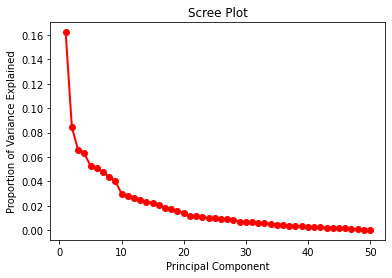

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

As can be seen the Scree plot flatlines after the 30th PC , hence capturing only 30 PCs

In [ ]:
#Running PCA Algorithm
pca = PCA(n_components=25)
principalComponents = pca.fit_transform(df_shoppers_copy.iloc[:,0:54])
#Creating column names
PCA_columns=["Principal_Component_{}".format(i) for i in range(principalComponents.shape[1])]
#Creating PCA DataFrame
df_PCA=pd.DataFrame(principalComponents,columns=PCA_columns)
df_PCA

,Principal_Component_0,Principal_Component_1,Principal_Component_2,Principal_Component_3,Principal_Component_4,Principal_Component_5,Principal_Component_6,Principal_Component_7,Principal_Component_8,Principal_Component_9,Principal_Component_10,Principal_Component_11,Principal_Component_12,Principal_Component_13,Principal_Component_14,Principal_Component_15,Principal_Component_16,Principal_Component_17,Principal_Component_18,Principal_Component_19,Principal_Component_20,Principal_Component_21,Principal_Component_22,Principal_Component_23,Principal_Component_24
0,-0.803179,-0.484213,-0.305456,0.364589,-0.495950,-0.248491,-0.297054,0.652111,0.044244,0.153585,-0.621871,0.290036,-0.256931,-0.118673,0.106223,-0.107951,-0.096853,0.087491,0.045976,0.023148,0.093990,-0.209874,-0.114576,0.105158,0.248949
1,-1.025286,-0.103061,0.211144,-0.788744,-0.417484,0.562140,0.613197,-0.314705,0.003029,0.131862,-0.112207,-0.135628,0.091035,-0.080005,-0.527270,-0.045508,-0.102692,-0.252210,1.011066,-0.444493,-0.208546,-0.418056,-0.233317,0.353519,0.211850
2,-0.911420,0.438878,0.317722,-0.319927,-0.287905,0.215642,0.566012,0.526654,0.007707,-0.580207,0.288503,0.443107,0.098307,0.159850,0.222934,-0.350184,0.473943,-0.660048,0.775069,0.190478,0.021194,-0.085637,-0.200457,0.374893,0.281556
3,-0.843196,-0.536711,0.067462,-0.063821,0.101384,-0.202639,-0.123459,0.745817,-0.266259,0.366458,0.188056,-0.146383,-0.549194,0.462459,-0.036791,-0.235063,-0.041568,0.298128,-0.058345,0.018915,0.123658,-0.253371,-0.107273,0.125249,0.199465
4,-0.990351,-0.552496,-0.117567,-0.282740,0.190494,0.157612,-0.522841,-0.111416,-0.027691,0.352778,0.248951,-0.011400,-0.647901,0.130686,-0.595307,-0.125896,-0.044881,0.278432,-0.259045,-0.844395,-0.492969,0.163688,-0.422052,0.505844,0.741748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10510,0.506795,0.369268,-0.057782,0.047091,0.508448,-0.353345,0.592461,0.424161,-0.577958,-0.984297,-0.091867,-0.061405,0.627474,0.272377,0.230482,-0.783254,0.535182,-0.141599,-0.337496,-0.103163,-0.118569,0.048922,0.321724,0.081067,0.116602
10511,-0.818985,-0.022775,0.168697,-0.146985,-0.775580,-0.043311,1.076059,0.507889,0.047427,-0.112184,0.545110,0.730585,-0.164730,-0.260460,0.246234,-0.349400,0.124215,-0.175638,-0.022310,-0.071686,-0.078218,0.125170,0.086146,0.055416,0.051360
10512,-1.021321,-0.043289,0.528060,-0.667260,-0.682600,0.269378,1.397294,0.536238,0.023053,0.662274,0.252314,0.552731,0.862682,0.506542,0.156296,0.048091,0.015635,-0.141936,0.326694,0.067809,-0.157454,0.232918,0.247886,-0.167911,-0.016127
10513,0.299332,-0.445602,-0.547031,-0.314213,-0.050229,-0.414233,-0.029663,-0.575762,-0.190812,0.807260,0.281243,0.272425,-0.312283,-0.332663,0.639208,-0.203931,-0.302241,-0.002230,0.084869,-0.008165,-0.163792,0.135314,0.113222,-0.030626,0.013290


In [ ]:
#Hence 25 components captures 90% of the total variance 
out_sum = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative PCA Variance",out_sum)

Cumulative PCA Variance [0.16224018 0.24644297 0.31218697 0.3751158  0.42771606 0.4783682
 0.52570679 0.56952349 0.60968446 0.63951452 0.66769742 0.69426562
 0.71923611 0.74239308 0.76469591 0.78555113 0.80344029 0.82055958
 0.83594601 0.85009103 0.86160797 0.8727788  0.88306958 0.89287729
 0.90236443]


In [ ]:
df_shoppers_copy

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,Weekend,SpecialDay_0.0,SpecialDay_0.4,SpecialDay_0.8,SpecialDay_1.0,SpecialDay_0.2,SpecialDay_0.6,Month_May,Month_Nov,Month_Mar,Month_Dec,Month_Oct,Month_Sep,Month_Jul,Month_Aug,Month_June,Month_Feb,OperatingSystems_2,OperatingSystems_1,OperatingSystems_3,OperatingSystems_4,Browser_2,Browser_1,Browser_4,Browser_5,Browser_6,Browser_10,Browser_8,Browser_3,Region_1,Region_3,Region_4,Region_2,Region_6,Region_7,TrafficType_2,TrafficType_1,TrafficType_3,TrafficType_4,TrafficType_13,TrafficType_6,TrafficType_10,VisitorType_Returning_Visitor,VisitorType_New_Visitor,Revenue
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,0.573535,-0.317178,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.045196,-0.317178,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.132035,-0.317178,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
8,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,-0.310366,0.342125,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.457683,-0.317178,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,1.261014,-0.317178,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.457683,-0.317178,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_shoppers_copy.iloc[:,0:51], df_shoppers_copy.iloc[:,51], test_size=0.20, random_state=20)

In [ ]:
for k in range(1,30):
  kNN_classifier = neighbors.KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
  kNN_classifier.fit(X_train, y_train)
  pred = kNN_classifier.predict(X_test)
  print('k=',k, 'Accuracy', accuracy_score(y_test, pred))

k= 1 Accuracy 0.85924869234427
k= 2 Accuracy 0.8815977175463623
k= 3 Accuracy 0.8758915834522111
k= 4 Accuracy 0.8801711840228246
k= 5 Accuracy 0.8773181169757489
k= 6 Accuracy 0.8834997622444127
k= 7 Accuracy 0.8877793628150261
k= 8 Accuracy 0.8877793628150261
k= 9 Accuracy 0.8901569186875892
k= 10 Accuracy 0.8920589633856396
k= 11 Accuracy 0.891583452211127
k= 12 Accuracy 0.889205896338564
k= 13 Accuracy 0.8887303851640513
k= 14 Accuracy 0.8887303851640513
k= 15 Accuracy 0.8896814075130766
k= 16 Accuracy 0.8868283404660009
k= 17 Accuracy 0.8896814075130766
k= 18 Accuracy 0.8858773181169758
k= 19 Accuracy 0.8887303851640513
k= 20 Accuracy 0.8868283404660009
k= 21 Accuracy 0.8887303851640513
k= 22 Accuracy 0.8863528292914884
k= 23 Accuracy 0.8877793628150261
k= 24 Accuracy 0.8858773181169758
k= 25 Accuracy 0.8887303851640513
k= 26 Accuracy 0.8873038516405135
k= 27 Accuracy 0.8896814075130766
k= 28 Accuracy 0.8887303851640513
k= 29 Accuracy 0.889205896338564


**We got 0.8915 accuracy with removing outliers, standardization and PCA.**

### **kNN Method**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_shoppers_knn.iloc[:,0:15], df_shoppers_knn.iloc[:,15], test_size=0.20, random_state=20)

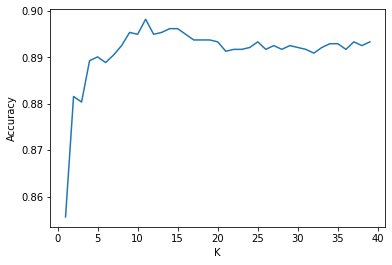

In [ ]:
accuracy_table = pd.DataFrame(columns=['K','Accuracy'])
ind =1
for k in range(1,40):
  kNN_classifier = neighbors.KNeighborsClassifier(n_neighbors = k, metric = 'euclidean', )
  kNN_classifier.fit(X_train, y_train)
  pred = kNN_classifier.predict(X_test)
  #print('k=',k, 'Accuracy', accuracy_score(y_test, pred))
  #accuracy_table.loc[k,:] = [k, accuracy_score(y_test, pred)]
  accuracy_table.loc[ind] = [k, accuracy_score(y_test, pred)]
  ind+=1

sns.lineplot(data=accuracy_table, y='Accuracy', x='K')


**We get max. accuracy 0.8982 when k= 11.**

In [ ]:
kNN_classifier = neighbors.KNeighborsClassifier(n_neighbors = 11, metric = 'euclidean')
kNN_classifier.fit(X_train, y_train)
pred = kNN_classifier.predict(X_test)
print('k=11, Accuracy:', accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

k=11, Accuracy: 0.8982157339821574
              precision    recall  f1-score   support

       False       0.91      0.98      0.94      2099
        True       0.77      0.45      0.57       367

    accuracy                           0.90      2466
   macro avg       0.84      0.71      0.76      2466
weighted avg       0.89      0.90      0.89      2466



In [ ]:
#KNN pipelines
pipe_kNN = Pipeline (steps = [ ('model',neighbors.KNeighborsClassifier(n_neighbors=11))])
pipe_kNN_scaled = Pipeline (steps = [('Scaler', StandardScaler()), ('model',neighbors.KNeighborsClassifier(n_neighbors=11))])
pipe_kNN_scaled_pca = Pipeline (steps = [('Scaler', StandardScaler()), ('pca',PCA(n_components=10)), ('model',neighbors.KNeighborsClassifier(n_neighbors=11))])

pipe_list = [pipe_kNN, pipe_kNN_scaled, pipe_kNN_scaled_pca]

for pipe in pipe_list:
  model = pipe.fit(X_train, y_train) 
  pred = model.predict(X_test)
  print('Accuracy', accuracy_score(y_test, pred))

Accuracy 0.8982157339821574
Accuracy 0.8880778588807786
Accuracy 0.8909164639091647


### **Introducing Oversampling method to testify wheather accuracy will increase or not**

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_shoppers_knn.iloc[:,0:15], df_shoppers_knn.iloc[:,15], test_size=0.2, random_state=20)

In [ ]:
counter = Counter(y_train)
print(counter)

Counter({False: 8323, True: 1541})


In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

Counter({True: 8323, False: 8323})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
kNN_classifier = neighbors.KNeighborsClassifier(n_neighbors = 11, metric = 'euclidean')
kNN_classifier.fit(X_train, y_train)
pred = kNN_classifier.predict(X_test)
print('Accuracy', accuracy_score(y_test, pred))

Accuracy 0.7984590429845905


In [ ]:
pipe_kNN = Pipeline (steps = [ ('model',neighbors.KNeighborsClassifier(n_neighbors=11))])
pipe_kNN_scaled = Pipeline (steps = [('Scaler', StandardScaler()), ('model',neighbors.KNeighborsClassifier(n_neighbors=11))])
pipe_kNN_scaled_pca = Pipeline (steps = [('Scaler', StandardScaler()), ('pca',PCA(n_components=5)), ('model',neighbors.KNeighborsClassifier(n_neighbors=11))])

pipe_list = [pipe_kNN, pipe_kNN_scaled, pipe_kNN_scaled_pca]

for pipe in pipe_list:
  model = pipe.fit(X_train, y_train) 
  pred = model.predict(X_test)
  print('Accuracy', accuracy_score(y_test, pred))

Accuracy 0.7984590429845905
Accuracy 0.8167072181670721
Accuracy 0.7793998377939984


**With oversampling of training set, we get 0.8236 accuracy which is less than when we do not oversample training set.**

### **Logistic Regression**

In [ ]:
df_shoppers_lr = df_shoppers_knn.copy()
df_shoppers_lr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.200000,0.000000,0.0,4,1,1,1,1,2,False,False
1,0,0.0,0,0.0,2,0.000000,0.000000,0.0,4,2,2,1,2,2,False,False
2,0,0.0,0,0.0,1,0.200000,0.000000,0.0,4,4,1,9,3,2,False,False
3,0,0.0,0,0.0,2,0.050000,0.000000,0.0,4,3,2,2,4,2,False,False
4,0,0.0,0,0.0,10,0.020000,0.000000,0.0,4,3,3,1,4,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,0.007143,12.241717,0.0,2,4,6,1,1,2,True,False
12326,0,0.0,0,0.0,5,0.000000,0.000000,0.0,2,3,2,1,8,2,True,False
12327,0,0.0,0,0.0,6,0.083333,0.000000,0.0,2,3,2,1,13,2,True,False
12328,4,75.0,0,0.0,15,0.000000,0.000000,0.0,2,2,2,3,11,2,False,False


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
#Split into test and train
X_train, X_test, y_train, y_test = train_test_split(
    df_shoppers_lr.iloc[:,0:15], df_shoppers_lr.iloc[:,15], test_size=0.20, random_state=20)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression(random_state=20, max_iter=450).fit(X_train, y_train)
pred = model.predict(X_test)
print('Accuracy', accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
#print(model.coef_)

Accuracy 0.8864557988645579
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2099
        True       0.73      0.38      0.50       367

    accuracy                           0.89      2466
   macro avg       0.81      0.68      0.72      2466
weighted avg       0.87      0.89      0.87      2466



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Logistic Regression gives us 0.8864 accuracy with 'lbfgs' solver which is more than any other solver like Saga, Sag and Newton etc.**

In [ ]:
#Pipeline for Logistic
pipe_kNN = Pipeline (steps = [ ('model',LogisticRegression(random_state=20, max_iter=450))])
pipe_kNN_scaled = Pipeline (steps = [('Scaler', StandardScaler()), ('model', LogisticRegression(random_state=20, max_iter=450))])
pipe_kNN_scaled_pca = Pipeline (steps = [('Scaler', StandardScaler()), ('pca',PCA(n_components=9)), ('model',LogisticRegression(random_state=20, max_iter=450))])

pipe_list = [pipe_kNN, pipe_kNN_scaled, pipe_kNN_scaled_pca]

for pipe in pipe_list:
  model = pipe.fit(X_train, y_train) 
  pred = model.predict(X_test)
  print('Accuracy', accuracy_score(y_test, pred))

Accuracy 0.8864557988645579
Accuracy 0.8852392538523925
Accuracy 0.8791565287915653


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### **Oversampling method to testify wheather accuracy will increase or not**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_shoppers_lr.iloc[:,0:15], df_shoppers_lr.iloc[:,15], test_size=0.2, random_state=20)

In [ ]:
counter = Counter(y_train)
print(counter)

Counter({False: 8323, True: 1541})


In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

Counter({True: 8323, False: 8323})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
model = LogisticRegression(random_state=20, max_iter=450).fit(X_train, y_train)
pred = model.predict(X_test)
print('Accuracy', accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
#print(model.coef_)

Accuracy 0.8686131386861314
              precision    recall  f1-score   support

       False       0.95      0.90      0.92      2099
        True       0.55      0.71      0.62       367

    accuracy                           0.87      2466
   macro avg       0.75      0.80      0.77      2466
weighted avg       0.89      0.87      0.88      2466



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### **Decison Tree**

In [ ]:
df_shoppers_dt = df_shoppers_knn.copy()
df_shoppers_dt

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.200000,0.000000,0.0,4,1,1,1,1,2,False,False
1,0,0.0,0,0.0,2,0.000000,0.000000,0.0,4,2,2,1,2,2,False,False
2,0,0.0,0,0.0,1,0.200000,0.000000,0.0,4,4,1,9,3,2,False,False
3,0,0.0,0,0.0,2,0.050000,0.000000,0.0,4,3,2,2,4,2,False,False
4,0,0.0,0,0.0,10,0.020000,0.000000,0.0,4,3,3,1,4,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,0.007143,12.241717,0.0,2,4,6,1,1,2,True,False
12326,0,0.0,0,0.0,5,0.000000,0.000000,0.0,2,3,2,1,8,2,True,False
12327,0,0.0,0,0.0,6,0.083333,0.000000,0.0,2,3,2,1,13,2,True,False
12328,4,75.0,0,0.0,15,0.000000,0.000000,0.0,2,2,2,3,11,2,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_shoppers_dt.iloc[:,0:8], df_shoppers_dt.iloc[:,15], test_size=0.20, random_state=20)

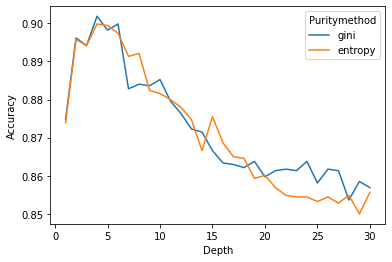

In [ ]:
#Determining best parameters for criterion and Depth of the tree based on the accuracy 
ind = 1
crit = ['gini', 'entropy']
df_results = pd.DataFrame(columns = ['Depth', 'Puritymethod', 'Accuracy'])

for i in np.arange(1, 31):
  for j in crit:
    model = DecisionTreeClassifier(max_depth=i, criterion=j)
    model.fit(X_train, y_train)
    pred = model.predict (X_test)
    df_results.loc[ind] = [i, j, accuracy_score(y_test, pred)]
    ind+=1
sns.lineplot(x = 'Depth', y = 'Accuracy', hue='Puritymethod', data = df_results)

In [ ]:
#Choosing Dept=4 and impurity criterion as gini
model = DecisionTreeClassifier(max_depth=4, criterion='gini')
model.fit(X_train, y_train)
pred = model.predict (X_test)
print('Accuracy: ', accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Accuracy:  0.9018653690186537
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      2099
        True       0.77      0.49      0.60       367

    accuracy                           0.90      2466
   macro avg       0.84      0.73      0.77      2466
weighted avg       0.89      0.90      0.89      2466



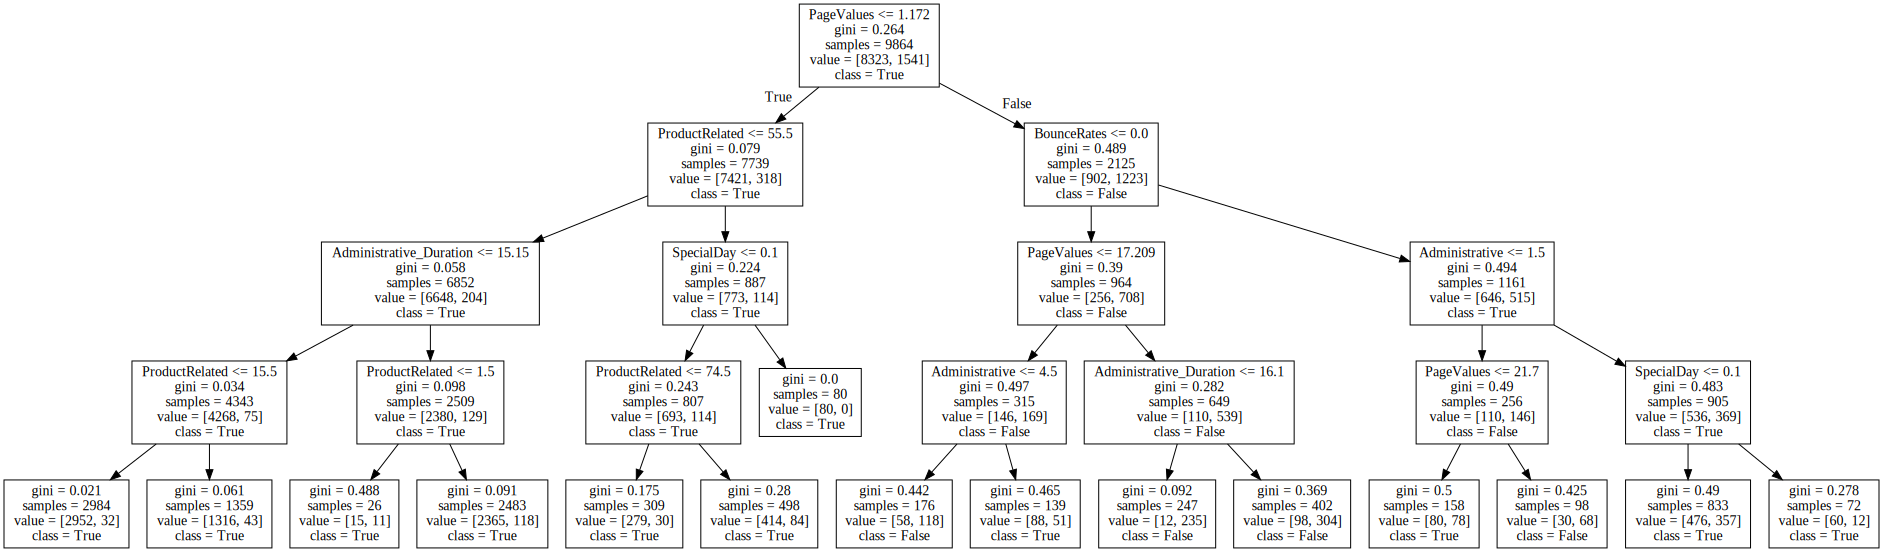

In [ ]:
dot_data = tree.export_graphviz(model, out_file=None, feature_names=X_train.columns, class_names=['True',  'False']) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_shoppers_dt.iloc[:,0:8], df_shoppers_dt.iloc[:,15], test_size=0.20, random_state=20)

Max Accuracy 0.9002433090024331
Accuracy:  0.8933495539334956


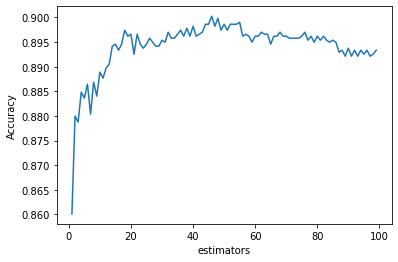

In [ ]:
#Determining the best estimators for Random Forest
results = pd.DataFrame(columns = ['estimators', 'Accuracy'])
for i in np.arange(1, 100):
  model_RF = RandomForestClassifier(max_depth=30, n_estimators=i, random_state=0).fit(X_train, y_train)
  pred = model_RF.predict(X_test)
  results.loc[i] = [i, accuracy_score(y_test, pred)]
print('Max Accuracy', results['Accuracy'].max())
print('Accuracy: ', accuracy_score(y_test, pred))
sns.lineplot(x = 'estimators', y = 'Accuracy', data = results)

F1 Score:  0.5103969754253308
Accuracy:  0.8949716139497161


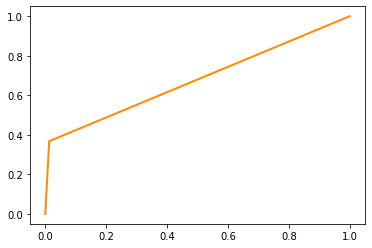

In [ ]:
model_RF = RandomForestClassifier(max_depth=4, n_estimators=52, random_state=20).fit(X_train, y_train)
pred = model_RF.predict(X_test)
print('F1 Score: ', f1_score(y_test, pred))
print('Accuracy: ', accuracy_score(y_test, pred))
fpr, tpr, _ = roc_curve(y_test, pred)
#roc_auc = auc(y_test, pred)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw)

### **Subsetting Predictors**

In [ ]:
df_shoppers_pre = pd.read_csv('online_shoppers_intention_reorder_columns.csv')
df_shoppers_pre

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Region,Weekend,VisitorType,Month,TrafficType,OperatingSystems,Browser,Revenue
0,0,0.0,0,0.0,1,0.200000,0.000000,0.0,1,False,Returning_Visitor,Feb,1,1,1,False
1,0,0.0,0,0.0,2,0.000000,0.000000,0.0,1,False,Returning_Visitor,Feb,2,2,2,False
2,0,0.0,0,0.0,1,0.200000,0.000000,0.0,9,False,Returning_Visitor,Feb,3,4,1,False
3,0,0.0,0,0.0,2,0.050000,0.000000,0.0,2,False,Returning_Visitor,Feb,4,3,2,False
4,0,0.0,0,0.0,10,0.020000,0.000000,0.0,1,True,Returning_Visitor,Feb,4,3,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,0.007143,12.241717,0.0,1,True,Returning_Visitor,Dec,1,4,6,False
12326,0,0.0,0,0.0,5,0.000000,0.000000,0.0,1,True,Returning_Visitor,Nov,8,3,2,False
12327,0,0.0,0,0.0,6,0.083333,0.000000,0.0,1,True,Returning_Visitor,Nov,13,3,2,False
12328,4,75.0,0,0.0,15,0.000000,0.000000,0.0,3,False,Returning_Visitor,Nov,11,2,2,False


In [ ]:
#Label Encoding
cleanup = {"Month":{"Feb": 4, "Mar": 2,"May": 2,"June": 2,"Jul": 2,"Aug": 2,"Sep": 2,"Oct": 2,"Nov": 2,"Dec": 2},
                "VisitorType": {"New_Visitor": 1, "Returning_Visitor": 2, "Other": 3}}

df_shoppers_pre = df_shoppers_pre.replace(cleanup)
df_shoppers_pre

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Region,Weekend,VisitorType,Month,TrafficType,OperatingSystems,Browser,Revenue
0,0,0.0,0,0.0,1,0.200000,0.000000,0.0,1,False,2,4,1,1,1,False
1,0,0.0,0,0.0,2,0.000000,0.000000,0.0,1,False,2,4,2,2,2,False
2,0,0.0,0,0.0,1,0.200000,0.000000,0.0,9,False,2,4,3,4,1,False
3,0,0.0,0,0.0,2,0.050000,0.000000,0.0,2,False,2,4,4,3,2,False
4,0,0.0,0,0.0,10,0.020000,0.000000,0.0,1,True,2,4,4,3,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,0.007143,12.241717,0.0,1,True,2,2,1,4,6,False
12326,0,0.0,0,0.0,5,0.000000,0.000000,0.0,1,True,2,2,8,3,2,False
12327,0,0.0,0,0.0,6,0.083333,0.000000,0.0,1,True,2,2,13,3,2,False
12328,4,75.0,0,0.0,15,0.000000,0.000000,0.0,3,False,2,2,11,2,2,False


### **kNN method with subsetted predictors**

In [ ]:
df_shoppers_knn = df_shoppers_pre.copy()
df_shoppers_knn

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Region,Weekend,VisitorType,Month,TrafficType,OperatingSystems,Browser,Revenue
0,0,0.0,0,0.0,1,0.200000,0.000000,0.0,1,False,2,4,1,1,1,False
1,0,0.0,0,0.0,2,0.000000,0.000000,0.0,1,False,2,4,2,2,2,False
2,0,0.0,0,0.0,1,0.200000,0.000000,0.0,9,False,2,4,3,4,1,False
3,0,0.0,0,0.0,2,0.050000,0.000000,0.0,2,False,2,4,4,3,2,False
4,0,0.0,0,0.0,10,0.020000,0.000000,0.0,1,True,2,4,4,3,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,0.007143,12.241717,0.0,1,True,2,2,1,4,6,False
12326,0,0.0,0,0.0,5,0.000000,0.000000,0.0,1,True,2,2,8,3,2,False
12327,0,0.0,0,0.0,6,0.083333,0.000000,0.0,1,True,2,2,13,3,2,False
12328,4,75.0,0,0.0,15,0.000000,0.000000,0.0,3,False,2,2,11,2,2,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_shoppers_pre.iloc[:,0:8], df_shoppers_pre.iloc[:,15], test_size=0.2, random_state=20)

In [ ]:
for k in range(1,30):
  kNN_classifier = neighbors.KNeighborsClassifier(n_neighbors = k, metric = 'euclidean', )
  kNN_classifier.fit(X_train, y_train)
  pred = kNN_classifier.predict(X_test)
  print('k=',k, 'Accuracy', accuracy_score(y_test, pred))

k= 1 Accuracy 0.8540145985401459
k= 2 Accuracy 0.8803730738037308
k= 3 Accuracy 0.8844282238442822
k= 4 Accuracy 0.8832116788321168
k= 5 Accuracy 0.8896999188969992
k= 6 Accuracy 0.8909164639091647
k= 7 Accuracy 0.8941605839416058
k= 8 Accuracy 0.8925385239253852
k= 9 Accuracy 0.8957826439578265
k= 10 Accuracy 0.8953771289537713
k= 11 Accuracy 0.8986212489862125
k= 12 Accuracy 0.8965936739659367
k= 13 Accuracy 0.8982157339821574
k= 14 Accuracy 0.8969991889699919
k= 15 Accuracy 0.8990267639902676
k= 16 Accuracy 0.8990267639902676
k= 17 Accuracy 0.8978102189781022
k= 18 Accuracy 0.8961881589618816
k= 19 Accuracy 0.8969991889699919
k= 20 Accuracy 0.8957826439578265
k= 21 Accuracy 0.8965936739659367
k= 22 Accuracy 0.894566098945661
k= 23 Accuracy 0.8953771289537713
k= 24 Accuracy 0.8941605839416058
k= 25 Accuracy 0.894566098945661
k= 26 Accuracy 0.8929440389294404
k= 27 Accuracy 0.894566098945661
k= 28 Accuracy 0.8921330089213301
k= 29 Accuracy 0.8933495539334956


**We get max. accuracy 0.8990 when k= 15 and with first 8 predictors. After this accuracy is decreasing.**

In [ ]:
kNN_classifier = neighbors.KNeighborsClassifier(n_neighbors = 15, metric = 'euclidean')
kNN_classifier.fit(X_train, y_train)
pred = kNN_classifier.predict(X_test)
print('k=15, Accuracy:', accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

k=15, Accuracy: 0.8990267639902676
              precision    recall  f1-score   support

       False       0.91      0.98      0.94      2099
        True       0.77      0.46      0.57       367

    accuracy                           0.90      2466
   macro avg       0.84      0.72      0.76      2466
weighted avg       0.89      0.90      0.89      2466



In [ ]:
pipe_kNN = Pipeline (steps = [ ('model',neighbors.KNeighborsClassifier(n_neighbors=15))])
pipe_kNN_scaled = Pipeline (steps = [('Scaler', StandardScaler()), ('model',neighbors.KNeighborsClassifier(n_neighbors=15))])
pipe_kNN_scaled_pca = Pipeline (steps = [('Scaler', StandardScaler()), ('pca',PCA(n_components=8)), ('model',neighbors.KNeighborsClassifier(n_neighbors=15))])

pipe_list = [pipe_kNN, pipe_kNN_scaled, pipe_kNN_scaled_pca]

for pipe in pipe_list:
  model = pipe.fit(X_train, y_train) 
  pred = model.predict(X_test)
  print('Accuracy', accuracy_score(y_test, pred))

Accuracy 0.8990267639902676
Accuracy 0.8957826439578265
Accuracy 0.8957826439578265


### **Logistic Regression with subsetted predictors**

In [ ]:
df_shoppers_lr = df_shoppers_pre.copy()
df_shoppers_lr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Region,Weekend,VisitorType,Month,TrafficType,OperatingSystems,Browser,Revenue
0,0,0.0,0,0.0,1,0.200000,0.000000,0.0,1,False,2,4,1,1,1,False
1,0,0.0,0,0.0,2,0.000000,0.000000,0.0,1,False,2,4,2,2,2,False
2,0,0.0,0,0.0,1,0.200000,0.000000,0.0,9,False,2,4,3,4,1,False
3,0,0.0,0,0.0,2,0.050000,0.000000,0.0,2,False,2,4,4,3,2,False
4,0,0.0,0,0.0,10,0.020000,0.000000,0.0,1,True,2,4,4,3,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,0.007143,12.241717,0.0,1,True,2,2,1,4,6,False
12326,0,0.0,0,0.0,5,0.000000,0.000000,0.0,1,True,2,2,8,3,2,False
12327,0,0.0,0,0.0,6,0.083333,0.000000,0.0,1,True,2,2,13,3,2,False
12328,4,75.0,0,0.0,15,0.000000,0.000000,0.0,3,False,2,2,11,2,2,False


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_shoppers_lr.iloc[:,0:8], df_shoppers_lr.iloc[:,15], test_size=0.20, random_state=20)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression(random_state=20, max_iter=450).fit(X_train, y_train)
pred = model.predict(X_test)
print('Accuracy', accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print(model.coef_)

Accuracy 0.884022708840227
              precision    recall  f1-score   support

       False       0.90      0.98      0.93      2099
        True       0.72      0.36      0.48       367

    accuracy                           0.88      2466
   macro avg       0.81      0.67      0.71      2466
weighted avg       0.87      0.88      0.87      2466

[[ 2.17389293e-02  5.51369779e-05  2.54984918e-02  1.44789176e-05
   6.27993568e-03 -4.95959310e+00  8.36558255e-02 -1.03971231e+00]]


In [ ]:
pipe_kNN = Pipeline (steps = [ ('model',LogisticRegression(random_state=20, max_iter=450))])
pipe_kNN_scaled = Pipeline (steps = [('Scaler', StandardScaler()), ('model', LogisticRegression(random_state=20, max_iter=450))])
pipe_kNN_scaled_pca = Pipeline (steps = [('Scaler', StandardScaler()), ('pca',PCA(n_components=8)), ('model',LogisticRegression(random_state=20, max_iter=450))])

pipe_list = [pipe_kNN, pipe_kNN_scaled, pipe_kNN_scaled_pca]

for pipe in pipe_list:
  model = pipe.fit(X_train, y_train) 
  pred = model.predict(X_test)
  print('Accuracy', accuracy_score(y_test, pred))

Accuracy 0.884022708840227
Accuracy 0.8856447688564477
Accuracy 0.8856447688564477


### **Neural Networks**

In [ ]:
df_shoppers_nn = df_shoppers_pre.copy()
#df_shoppers_nn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_shoppers_nn.iloc[:,0:8], df_shoppers_nn.iloc[:,15], test_size=0.20, random_state=20)

In [ ]:
model = MLPClassifier(max_iter=500, learning_rate_init= 0.001, activation='logistic')
model.fit(X_train, y_train)
pred = model.predict(X_test)

Accuracy:  0.8986212489862125

Classification Report: 
              precision    recall  f1-score   support

       False       0.93      0.96      0.94      2099
        True       0.70      0.57      0.62       367

    accuracy                           0.90      2466
   macro avg       0.81      0.76      0.78      2466
weighted avg       0.89      0.90      0.89      2466


ROC Curve: 


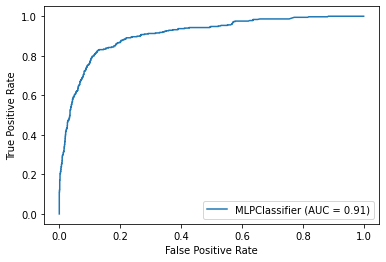

In [ ]:
print('Accuracy: ', accuracy_score(y_test, pred))
print("")
print("Classification Report: ")
print(classification_report(y_test, pred))

print('')
print("ROC Curve: ")
plot_roc_curve(model,X_test,y_test)
plt.show()

In [ ]:
# With different transfer functions and learning rates

result = pd.DataFrame(columns=['Learning Rate', 'Transfer Function',  'Accuracy'])
lr = [0.0001, 0.001, 0.01, 0.03, 1, 3, 6]
transfer_function = ['identity', 'logistic', 'tanh', 'relu']
k=0
for i in lr:
  for j in transfer_function:
    model = MLPClassifier(learning_rate_init= i, activation=j)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    result.loc[k] = [i, j,  accuracy_score(y_test, pred)]
    k+=1
print(tabulate(result, headers=result.columns, tablefmt='grid'))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


+----+-----------------+---------------------+------------+
|    |   Learning Rate | Transfer Function   |   Accuracy |
+====+=================+=====================+============+
|  0 |          0.0001 | identity            |   0.885239 |
+----+-----------------+---------------------+------------+
|  1 |          0.0001 | logistic            |   0.900649 |
+----+-----------------+---------------------+------------+
|  2 |          0.0001 | tanh                |   0.899027 |
+----+-----------------+---------------------+------------+
|  3 |          0.0001 | relu                |   0.884428 |
+----+-----------------+---------------------+------------+
|  4 |          0.001  | identity            |   0.879157 |
+----+-----------------+---------------------+------------+
|  5 |          0.001  | logistic            |   0.896594 |
+----+-----------------+---------------------+------------+
|  6 |          0.001  | tanh                |   0.892944 |
+----+-----------------+----------------

Here we got max accuracy**(0.9006)** when Learning rate = 0.0001 and transfer function = Logistic


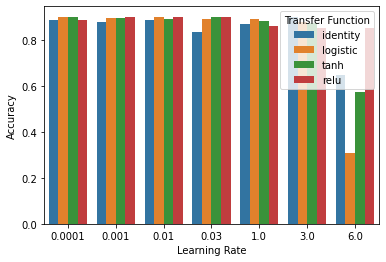

In [ ]:
sns.barplot(x='Learning Rate', y='Accuracy', hue='Transfer Function', data=result)

In [ ]:
from sklearn.model_selection import GridSearchCV
model = MLPClassifier()
parameters = {'activation':('identity', 'logistic', 'tanh', 'relu'), 'learning_rate_init':[ 0.0001, 0.001, 0.003]}
optimized_model = GridSearchCV(model, parameters, cv=5)
scaler = StandardScaler()
optimized_model.fit(scaler.fit_transform(X_train), y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [ ]:
optimized_model.best_score_

0.8927407424161269

In [ ]:
optimized_model.param_grid

{'activation': ('identity', 'logistic', 'tanh', 'relu'),
 'learning_rate_init': [0.0001, 0.001, 0.003]}

### **XG Boosting**

In [ ]:
pip install xgboost

In [ ]:
df_shoppers_xgb = df_shoppers_pre.copy()
#df_shoppers_nn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_shoppers_xgb.iloc[:,0:8], df_shoppers_xgb.iloc[:,15], test_size=0.20, random_state=20)

In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)
preds = xgb_cl.predict(X_test)
accuracy_score(y_test, preds)

0.8986212489862125

**Hyperparameter Tuning of XGBoost with GridSearchCV**

In [ ]:
param_grid = {
    "max_depth": [3, 5],
    "learning_rate": [ 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_cl = xgb.XGBClassifier(objective="binary:logistic")
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=10, scoring="roc_auc")
_ = grid_cv.fit(df_shoppers_xgb.iloc[:,0:8], df_shoppers_xgb.iloc[:,15])

In [ ]:
grid_cv.best_score_

0.9003616238535876

In [ ]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 5,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [ ]:
# Second round of changing parameters

param_grid["scale_pos_weight"] = [3]
param_grid["subsample"] = [0.8]
param_grid["colsample_bytree"] = [0.5]

param_grid["gamma"] = [3, 5, 7]
param_grid["max_depth"] = [9, 15, 20]
param_grid["reg_lambda"] = [10, 30, 50]
param_grid["learning_rate"] = [0.3, 0.5, 0.7, 1]

In [ ]:
grid_cv_2 = GridSearchCV(xgb_cl, param_grid, 
                         cv=5, scoring="roc_auc", n_jobs=-1)

_ = grid_cv_2.fit(df_shoppers_xgb.iloc[:,0:15], df_shoppers_xgb.iloc[:,15])

grid_cv_2.best_score_


0.9043623973916605

In [ ]:
grid_cv_2.best_params_

{'colsample_bytree': 0.5,
 'gamma': 7,
 'learning_rate': 0.5,
 'max_depth': 15,
 'reg_lambda': 50,
 'scale_pos_weight': 3,
 'subsample': 0.8}

**From this XGBoost hyperparameter, we got max accuracy 0.9043 so far.**

In [ ]:
df_shoppers_copy

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,Weekend,Revenue,SpecialDay_0.0,SpecialDay_0.4,SpecialDay_0.8,SpecialDay_1.0,SpecialDay_0.2,SpecialDay_0.6,Month_May,Month_Nov,Month_Mar,Month_Dec,Month_Oct,Month_Sep,Month_Jul,Month_Aug,Month_June,Month_Feb,OperatingSystems_2,OperatingSystems_1,OperatingSystems_3,OperatingSystems_4,Browser_2,Browser_1,Browser_4,Browser_5,Browser_6,Browser_10,Browser_8,Browser_3,Region_1,Region_3,Region_4,Region_2,Region_6,Region_7,TrafficType_2,TrafficType_1,TrafficType_3,TrafficType_4,TrafficType_13,TrafficType_6,TrafficType_10,VisitorType_Returning_Visitor,VisitorType_New_Visitor
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,0.573535,-0.317178,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.045196,-0.317178,True,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.132035,-0.317178,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,-0.310366,0.342125,True,False,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.457683,-0.317178,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,1.261014,-0.317178,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.457683,-0.317178,False,False,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
